In [69]:
import pandas as pd
import json
import os

In [75]:
from wordcloud import WordCloud, STOPWORDS

In [102]:
files = "./files"

In [104]:
def createTagCloud(dirPath, filename, query = "All", lang = 'und'):
    with open('/'.join([dirPath, filename])) as f:
        data = json.load(f, encoding='utf-8')
    frequesnces = map(lambda x: (x.upper(), data[x]), data.keys())
    cloud = WordCloud(stopwords=STOPWORDS, background_color='white', width=800, height=600)
    cloud.generate_from_frequencies(frequesnces)
    root = './Clouds'
    savePath = '/'.join([root, query])
    if not (os.path.exists(savePath)): os.makedirs(savePath)
    
    cloud.to_file('/'.join([savePath, filename + '.png']))

In [89]:
for query in os.listdir(files):
    dirPath = '/'.join([files, query])
    for filename in os.listdir(dirPath):
        lang = filename.split('.')[0]
        createTagCloud(dirPath, filename, query, lang)

In [112]:
data = {}
for query in os.listdir(files):
    filePath = '/'.join([files, query, query+'.txt'])
    with open(filePath) as f:
        data[query] = json.load(f, encoding='utf-8')

In [230]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [121]:
data['RealMadrid']

{u'ar': 179,
 u'da': 2,
 u'de': 13,
 u'el': 1,
 u'en': 797,
 u'es': 2276,
 u'fa': 1,
 u'fr': 289,
 u'ht': 13,
 u'hu': 1,
 u'hy': 1,
 u'in': 184,
 u'is': 1,
 u'it': 71,
 u'iw': 1,
 u'ja': 273,
 u'ko': 1,
 u'lv': 1,
 u'nl': 7,
 u'no': 1,
 u'pl': 3,
 u'pt': 32,
 u'ru': 12,
 u'th': 3,
 u'tl': 11,
 u'tr': 14,
 u'und': 812}

In [199]:
import codecs

In [217]:
def getisocodes_dict(data_path):
    # Provide a map from ISO code (both bibliographic and terminologic)
    # in ISO 639-2 to a dict with the two letter ISO 639-2 codes (alpha2)
    # English and french names
    #
    # "bibliographic" iso codes are derived from English word for the language
    # "terminologic" iso codes are derived from the pronunciation in the target 
    # language (if different to the bibliographic code)

    D = {}
    f = codecs.open(data_path, 'rb', 'utf-8')
    for line in f:
        iD = {}
        iD['bibliographic'], iD['terminologic'], iD['alpha2'], \
            iD['english'], iD['french'] = line.strip().split('|')
        D[iD['bibliographic']] = iD

        if iD['terminologic']:
            D[iD['terminologic']] = iD

        if iD['alpha2']:
            D[iD['alpha2']] = iD

        for k in iD:
            # Assign `None` when columns not available from the data
            iD[k] = iD[k] or None
    f.close()
    return D

languages = getisocodes_dict('ISO-639-2_utf-8.txt')

In [221]:
df = pd.DataFrame(data).fillna(0)
newindex = [languages[index]['english'] for index in df.index]

In [222]:
df.index = newindex

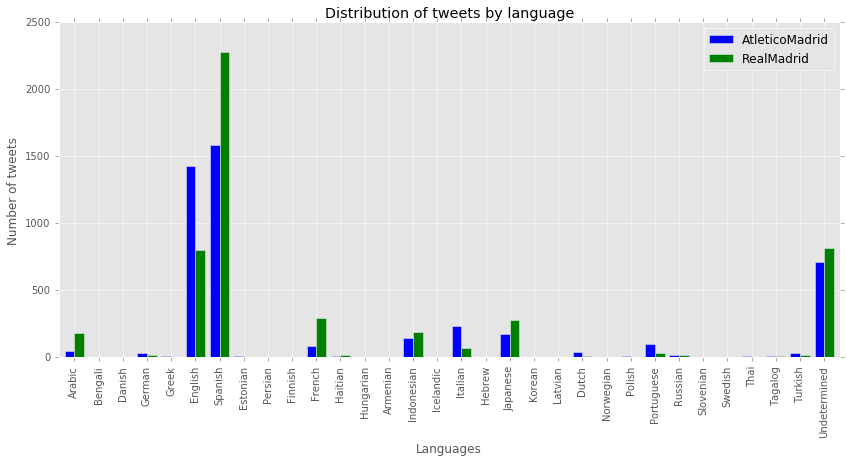

In [250]:
ax = df.plot(kind='bar', figsize=(14,6), width=0.8)
ax.set_xlabel("Languages")
ax.set_ylabel("Number of tweets")
ax.set_title("Distribution of tweets by language")